In [3]:
from motionchart.motionchart import MotionChart
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import linregress

In [278]:
def global_plot_setting(ylimit=None):
    ax = plt.gca()
    ttl = ax.title
    ttl.set_position([.5, 1.1])
    if(ylimit):
        ax.set_ylim(ylimit)
    plt.legend(bbox_to_anchor=(1,1),loc=2)
    plt.show()

# Task1

### ERP

In [113]:
ERP = pd.read_csv('ERP_by state and gender.csv')
ERP.head(5)

,Unnamed: 0,Estimated Resident Population ; Male ; New South Wales ;,Estimated Resident Population ; Male ; Victoria ;,Estimated Resident Population ; Male ; Queensland ;,Estimated Resident Population ; Male ; South Australia ;,Estimated Resident Population ; Male ; Western Australia ;,Estimated Resident Population ; Male ; Tasmania ;,Estimated Resident Population ; Male ; Northern Territory ;,Estimated Resident Population ; Male ; Australian Capital Territory ;,Estimated Resident Population ; Male ; Australia ;,...,Estimated Resident Population ; Female ; Australia ;,Estimated Resident Population ; Persons ; New South Wales ;,Estimated Resident Population ; Persons ; Victoria ;,Estimated Resident Population ; Persons ; Queensland ;,Estimated Resident Population ; Persons ; South Australia ;,Estimated Resident Population ; Persons ; Western Australia ;,Estimated Resident Population ; Persons ; Tasmania ;,Estimated Resident Population ; Persons ; Northern Territory ;,Estimated Resident Population ; Persons ; Australian Capital Territory ;,Estimated Resident Population ; Persons ; Australia ;
0,01-Dec-05,3327461,2481962,1977783,762665,1022918,240625,107839,164850,10087382,...,10224161,6718023,5023203,3964175,1544852,2029936,488098,207385,333505,20311543
1,01-Mar-06,3336005,2495951,1989764,765272,1030021,241193,108137,165351,10132982,...,10265150,6735528,5048207,3987653,1550135,2042450,489140,208347,334299,20398132
2,01-Jun-06,3339035,2502687,1999858,766432,1034567,241227,108502,165814,10159424,...,10291542,6742690,5061266,4007992,1552529,2050581,489302,209057,335170,20450966
3,01-Sep-06,3351254,2514544,2011909,768884,1040869,241864,109220,166549,10206440,...,10335842,6766133,5083593,4031580,1557332,2064032,490354,210284,336547,20542282
4,01-Dec-06,3361292,2524859,2023921,770847,1047061,242549,109586,167405,10248923,...,10378624,6786160,5103965,4055845,1561300,2076867,491515,211029,338381,20627547


In [114]:
ERP.iloc[:,0]=pd.to_datetime(pd.to_datetime(ERP.iloc[:,0]).apply(lambda x: datetime.datetime.strftime(x, '%Y-%m-%d')))
ERP.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
ERP.head(5)

,Date,Estimated Resident Population ; Male ; New South Wales ;,Estimated Resident Population ; Male ; Victoria ;,Estimated Resident Population ; Male ; Queensland ;,Estimated Resident Population ; Male ; South Australia ;,Estimated Resident Population ; Male ; Western Australia ;,Estimated Resident Population ; Male ; Tasmania ;,Estimated Resident Population ; Male ; Northern Territory ;,Estimated Resident Population ; Male ; Australian Capital Territory ;,Estimated Resident Population ; Male ; Australia ;,...,Estimated Resident Population ; Female ; Australia ;,Estimated Resident Population ; Persons ; New South Wales ;,Estimated Resident Population ; Persons ; Victoria ;,Estimated Resident Population ; Persons ; Queensland ;,Estimated Resident Population ; Persons ; South Australia ;,Estimated Resident Population ; Persons ; Western Australia ;,Estimated Resident Population ; Persons ; Tasmania ;,Estimated Resident Population ; Persons ; Northern Territory ;,Estimated Resident Population ; Persons ; Australian Capital Territory ;,Estimated Resident Population ; Persons ; Australia ;
0,2005-12-01,3327461,2481962,1977783,762665,1022918,240625,107839,164850,10087382,...,10224161,6718023,5023203,3964175,1544852,2029936,488098,207385,333505,20311543
1,2006-03-01,3336005,2495951,1989764,765272,1030021,241193,108137,165351,10132982,...,10265150,6735528,5048207,3987653,1550135,2042450,489140,208347,334299,20398132
2,2006-06-01,3339035,2502687,1999858,766432,1034567,241227,108502,165814,10159424,...,10291542,6742690,5061266,4007992,1552529,2050581,489302,209057,335170,20450966
3,2006-09-01,3351254,2514544,2011909,768884,1040869,241864,109220,166549,10206440,...,10335842,6766133,5083593,4031580,1557332,2064032,490354,210284,336547,20542282
4,2006-12-01,3361292,2524859,2023921,770847,1047061,242549,109586,167405,10248923,...,10378624,6786160,5103965,4055845,1561300,2076867,491515,211029,338381,20627547


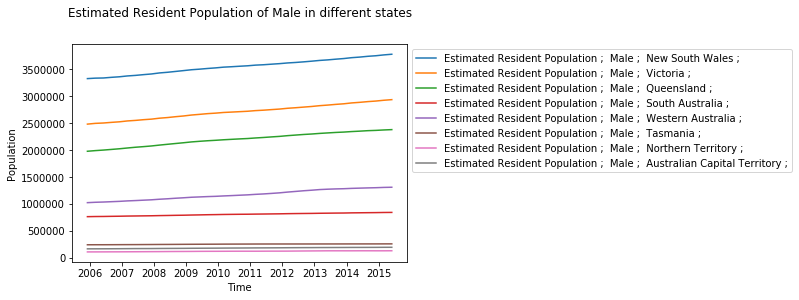

In [282]:
for i in range(1,9):
    plt.plot(ERP.iloc[:,0],ERP[ERP.columns[i]],label=ERP.columns[i])

plt.title('Estimated Resident Population of Male in different states')
plt.xlabel('Time')
plt.ylabel('Population')    

global_plot_setting()

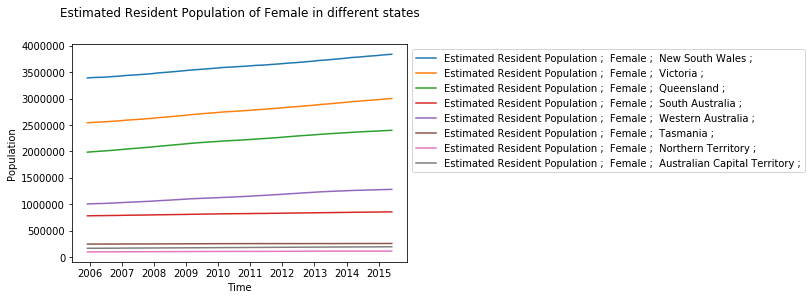

In [120]:
for i in range(10,18):
     plt.plot(ERP.iloc[:,0],ERP[ERP.columns[i]],label=ERP.columns[i])

plt.title('Estimated Resident Population of Female in different states')
plt.xlabel('Time')
plt.ylabel('Population')    

global_plot_setting()

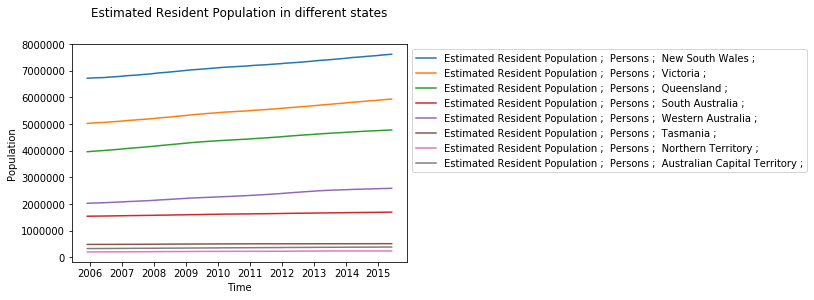

In [279]:
for i in range(19,27):
    plt.plot(ERP.iloc[:,0],ERP[ERP.columns[i]],label=ERP.columns[i])

plt.title('Estimated Resident Population in different states')
plt.xlabel('Time')
plt.ylabel('Population')    

global_plot_setting()

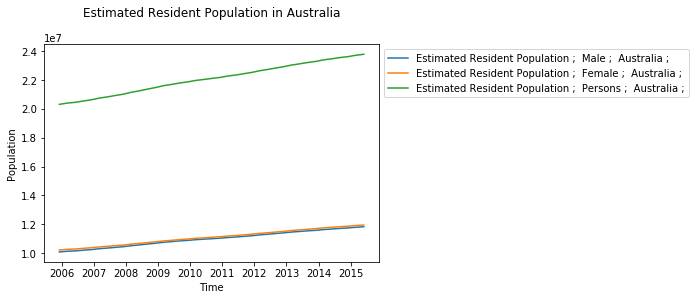

In [280]:
for i in (9,18,27):
    plt.plot(ERP.iloc[:,0],ERP[ERP.columns[i]],label=ERP.columns[i])

plt.title('Estimated Resident Population in Australia')
plt.xlabel('Time')
plt.ylabel('Population')    

global_plot_setting()

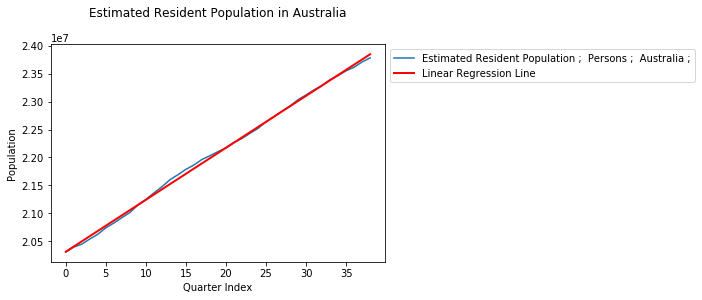

slope:  92914.5532388664  intercept:  20314934.437179487
r value:  0.9993038449406358
p value:  1.868575189737815e-54
std_err:  570.2663097470784


In [281]:
quarter_index= range(0,len(ERP.index))
plt.plot(ERP[ERP.columns[27]],label=ERP.columns[27])
slope, intercept, r_value, p_value, std_err = linregress(quarter_index,ERP.iloc[:,27])
line = [slope*xi + intercept for xi in quarter_index]
plt.plot(quarter_index,line,'r-', linewidth=2,label="Linear Regression Line")

plt.title('Estimated Resident Population in Australia')
plt.xlabel('Quarter Index')
plt.ylabel('Population') 

global_plot_setting()
print("slope: ",slope," intercept: ",intercept)
print("r value: ",r_value)
print("p value: ",p_value)
print("std_err: ",std_err)

### House_price_Index

In [5]:
House_price_Index = pd.read_csv('House Price Index.csv')
House_price_Index.head(5)

,Unnamed: 0,Residential Property Price Index ; Sydney ;,Residential Property Price Index ; Melbourne ;,Residential Property Price Index ; Brisbane ;,Residential Property Price Index ; Adelaide ;,Residential Property Price Index ; Perth ;,Residential Property Price Index ; Hobart ;,Residential Property Price Index ; Darwin ;,Residential Property Price Index ; Canberra ;
0,01-Dec-05,81.8,64.0,75.0,71.6,70.0,79.1,60.2,71.7
1,01-Mar-06,80.8,65.4,75.6,72.2,75.6,81.0,63.2,72.5
2,01-Jun-06,82.3,67.2,77.5,73.4,86.4,83.4,67.1,74.3
3,01-Sep-06,82.0,68.1,78.5,73.8,95.1,84.6,67.3,76.0
4,01-Dec-06,82.7,69.5,80.5,75.7,98.4,86.1,70.5,77.1


In [194]:
House_price_Index.iloc[:,0]=pd.to_datetime(pd.to_datetime(House_price_Index.iloc[:,0]).apply(lambda x: datetime.datetime.strftime(x, '%Y-%m-%d')))
House_price_Index.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
House_price_Index.head(5)

,Date,Residential Property Price Index ; Sydney ;,Residential Property Price Index ; Melbourne ;,Residential Property Price Index ; Brisbane ;,Residential Property Price Index ; Adelaide ;,Residential Property Price Index ; Perth ;,Residential Property Price Index ; Hobart ;,Residential Property Price Index ; Darwin ;,Residential Property Price Index ; Canberra ;
0,2005-12-01,81.8,64.0,75.0,71.6,70.0,79.1,60.2,71.7
1,2006-03-01,80.8,65.4,75.6,72.2,75.6,81.0,63.2,72.5
2,2006-06-01,82.3,67.2,77.5,73.4,86.4,83.4,67.1,74.3
3,2006-09-01,82.0,68.1,78.5,73.8,95.1,84.6,67.3,76.0
4,2006-12-01,82.7,69.5,80.5,75.7,98.4,86.1,70.5,77.1


In [6]:
House_price_Index.columns

Index(['Unnamed: 0', 'Residential Property Price Index ;  Sydney ;',
       'Residential Property Price Index ;  Melbourne ;',
       'Residential Property Price Index ;  Brisbane ;',
       'Residential Property Price Index ;  Adelaide ;',
       'Residential Property Price Index ;  Perth ;',
       'Residential Property Price Index ;  Hobart ;',
       'Residential Property Price Index ;  Darwin ;',
       'Residential Property Price Index ;  Canberra ;'],
      dtype='object')

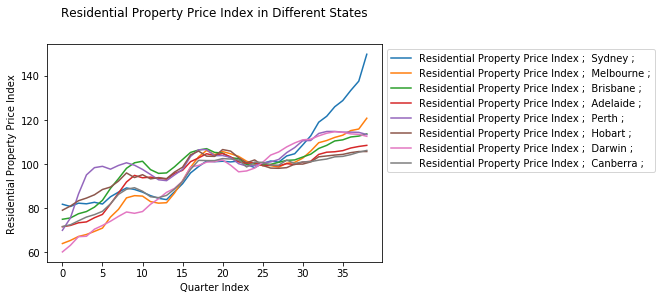

In [283]:
for i in range(1,9):
    plt.plot(House_price_Index[House_price_Index.columns[i]],label=House_price_Index.columns[i])

plt.title('Residential Property Price Index in Different States')
plt.xlabel('Quarter Index')
plt.ylabel('Residential Property Price Index')    

global_plot_setting()

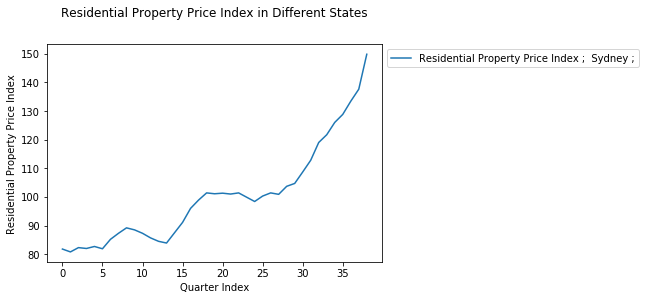

In [196]:
plt.plot(House_price_Index[House_price_Index.columns[1]],label=House_price_Index.columns[1])

plt.title('Residential Property Price Index in Different States')
plt.xlabel('Quarter Index')
plt.ylabel('Residential Property Price Index')    

global_plot_setting()

slope:  1.3879352226720654  intercept:  73.88307692307691
r value:  0.9159057179134694
p value:  3.041172131513447e-16
std_err:  0.09999720595582852


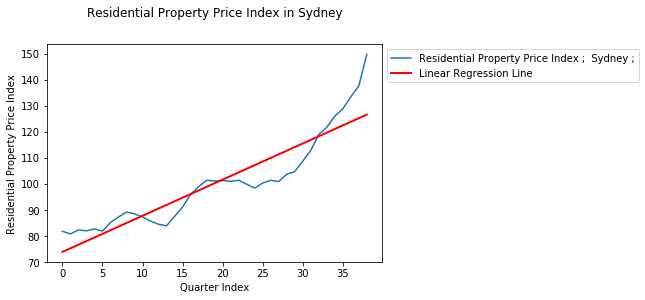

In [34]:
quarter_index= range(0,len(House_price_Index.index))
plt.plot(House_price_Index[House_price_Index.columns[1]],label=House_price_Index.columns[1])
slope, intercept, r_value, p_value, std_err = linregress(quarter_index,House_price_Index.iloc[:,1])
line = [slope*xi + intercept for xi in quarter_index]
plt.plot(quarter_index,line,'r-', linewidth=2,label="Linear Regression Line")

plt.title('Residential Property Price Index in Sydney')
plt.xlabel('Quarter Index')
plt.ylabel('Residential Property Price Index') 

global_plot_setting()
print("slope: ",slope," intercept: ",intercept)
print("r value: ",r_value)
print("p value: ",p_value)
print("std_err: ",std_err)

slope:  4.578333333333334  intercept:  -29.241111111111138
r value:  0.982444971294653
p value:  2.320100292919461e-06
std_err:  0.32858784753087567


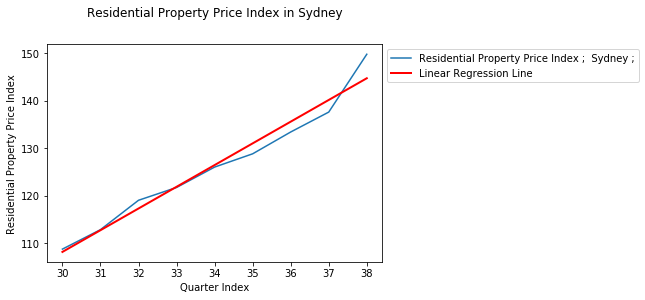

In [35]:
start_quarter=30
quarter_index= range(start_quarter,len(House_price_Index.index))
plt.plot(House_price_Index[House_price_Index.columns[1]][start_quarter:],label=House_price_Index.columns[1])
slope, intercept, r_value, p_value, std_err = linregress(quarter_index,House_price_Index.iloc[start_quarter:,1])
line = [slope*xi + intercept for xi in quarter_index]
plt.plot(quarter_index,line,'r-', linewidth=2,label="Linear Regression Line")

plt.title('Residential Property Price Index in Sydney')
plt.xlabel('Quarter Index')
plt.ylabel('Residential Property Price Index') 

global_plot_setting()
print("slope: ",slope," intercept: ",intercept)
print("r value: ",r_value)
print("p value: ",p_value)
print("std_err: ",std_err)

slope:  1.299574898785425  intercept:  69.56448717948717


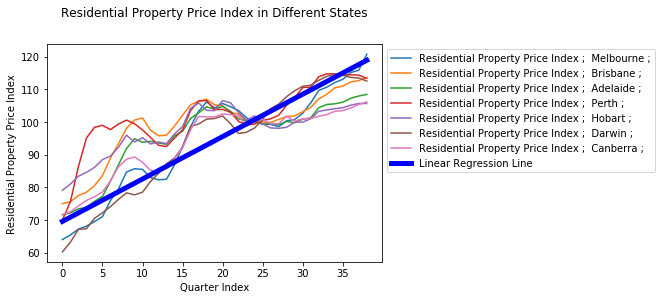

In [45]:
for i in range(2,9):
    plt.plot(House_price_Index[House_price_Index.columns[i]],label=House_price_Index.columns[i])
quarter_index= range(0,len(House_price_Index.index))
slope, intercept, r_value, p_value, std_err = linregress(quarter_index,House_price_Index.iloc[:,2])
line = [slope*xi + intercept for xi in quarter_index]
plt.plot(quarter_index,line,'b-', linewidth=5,label="Linear Regression Line")

plt.title('Residential Property Price Index in Different States')
plt.xlabel('Quarter Index')
plt.ylabel('Residential Property Price Index')    

global_plot_setting()
print("slope: ",slope," intercept: ",intercept)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

### Employment Data

In [162]:
SA4 = pd.read_excel('SA4 Time Series - October 2016.xls', sheet_name='Time Series')
SA4.head(5)

,State/Territory,Date,Employment Rate (15-64),Unemployment Rate (15+),Participation Rate (15+)
0,NSW,1978-02-01,NaN,6.773762,60.735313
1,NSW,1978-03-01,NaN,6.490161,59.851078
2,NSW,1978-04-01,63.719468,6.507978,60.168513
3,NSW,1978-05-01,63.682010,6.115171,60.003564
4,NSW,1978-06-01,63.682900,6.424127,60.145380


In [68]:
SA4.columns

Index(['State/Territory', 'Date', 'Employment Rate (15-64)',
       'Unemployment Rate (15+)', 'Participation Rate (15+)'],
      dtype='object')

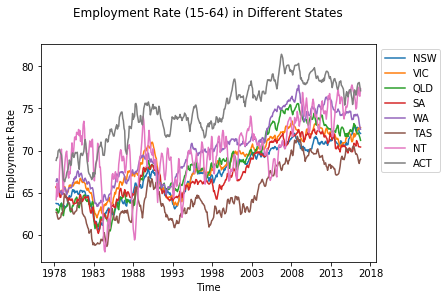

In [204]:
for state in SA4['State/Territory'].unique():
    plt.plot(SA4[SA4['State/Territory']==state]['Date'],SA4[SA4['State/Territory']==state]['Employment Rate (15-64)'],
            label=state)
plt.title('Employment Rate (15-64) in Different States')
plt.xlabel('Time')
plt.ylabel('Employment Rate')    

global_plot_setting()

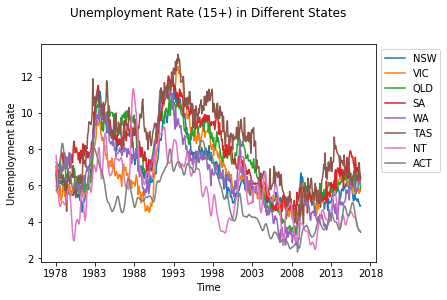

In [205]:
for state in SA4['State/Territory'].unique():
    plt.plot(SA4[SA4['State/Territory']==state]['Date'],SA4[SA4['State/Territory']==state]['Unemployment Rate (15+)'],
            label=state)
plt.title('Unemployment Rate (15+) in Different States')
plt.xlabel('Time')
plt.ylabel('Unemployment Rate')    

global_plot_setting()

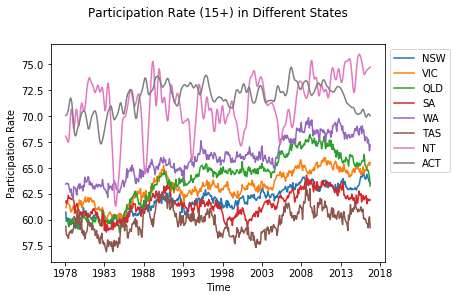

In [206]:
for state in SA4['State/Territory'].unique():
    plt.plot(SA4[SA4['State/Territory']==state]['Date'],SA4[SA4['State/Territory']==state]['Participation Rate (15+)'],
            label=state)
plt.title('Participation Rate (15+) in Different States')
plt.xlabel('Time')
plt.ylabel('Participation Rate')    

global_plot_setting()

# Merge Tables

### Reorganize SA4 table

In [163]:
SA4.isnull().any()
SA4[SA4['Employment Rate (15-64)'].isnull()]

,State/Territory,Date,Employment Rate (15-64),Unemployment Rate (15+),Participation Rate (15+)
0,NSW,1978-02-01,NaN,6.773762,60.735313
1,NSW,1978-03-01,NaN,6.490161,59.851078
465,VIC,1978-02-01,NaN,5.956411,61.161852
466,VIC,1978-03-01,NaN,5.746178,61.317251
930,QLD,1978-02-01,NaN,7.266082,60.212224
931,QLD,1978-03-01,NaN,7.279538,60.227423
1395,SA,1978-02-01,NaN,7.076868,61.794285
1396,SA,1978-03-01,NaN,6.448651,61.579208
1860,WA,1978-02-01,NaN,6.575607,63.452472
1861,WA,1978-03-01,NaN,5.971626,63.516332


In [181]:
SA4_2=pd.DataFrame()

In [182]:
SA4_2['Date']=SA4['Date'].unique()

In [183]:
for rate in SA4.columns[2:]:
    for state in SA4['State/Territory'].unique():
        SA4_2[rate+" "+state]=SA4[SA4['State/Territory']==state][rate].values

In [186]:
SA4_2.head(5)

,Date,Employment Rate (15-64) NSW,Employment Rate (15-64) VIC,Employment Rate (15-64) QLD,Employment Rate (15-64) SA,Employment Rate (15-64) WA,Employment Rate (15-64) TAS,Employment Rate (15-64) NT,Employment Rate (15-64) ACT,Unemployment Rate (15+) NSW,...,Unemployment Rate (15+) NT,Unemployment Rate (15+) ACT,Participation Rate (15+) NSW,Participation Rate (15+) VIC,Participation Rate (15+) QLD,Participation Rate (15+) SA,Participation Rate (15+) WA,Participation Rate (15+) TAS,Participation Rate (15+) NT,Participation Rate (15+) ACT
0,1978-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.773762,...,7.657833,5.716305,60.735313,61.161852,60.212224,61.794285,63.452472,59.367945,68.071948,70.077984
1,1978-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.490161,...,7.037714,5.770590,59.851078,61.317251,60.227423,61.579208,63.516332,58.549787,67.923245,70.109720
2,1978-04-01,63.719468,65.595123,62.948804,65.672365,66.330594,62.680931,64.162754,68.827256,6.507978,...,6.378075,5.805420,60.168513,61.847414,59.926431,61.759721,63.517919,58.472609,67.756889,70.170292
3,1978-05-01,63.682010,65.899883,63.093112,65.663103,66.644346,62.575082,66.095177,69.147866,6.115171,...,5.773537,5.897355,60.003564,61.692623,59.805965,61.910162,63.458373,58.497824,67.540683,70.387886
4,1978-06-01,63.682900,65.893910,62.822852,65.582892,66.616567,62.128582,64.523927,69.159853,6.424127,...,5.273143,6.052601,60.145380,61.540703,59.520770,62.355865,63.477033,58.207940,67.479402,70.660131


In [198]:
big_table = pd.merge(ERP, SA4_2, on=['Date'])
big_table = pd.merge(big_table, House_price_Index, on=['Date'])

In [234]:
big_table.head(5)

,Date,Estimated Resident Population ; Male ; New South Wales ;,Estimated Resident Population ; Male ; Victoria ;,Estimated Resident Population ; Male ; Queensland ;,Estimated Resident Population ; Male ; South Australia ;,Estimated Resident Population ; Male ; Western Australia ;,Estimated Resident Population ; Male ; Tasmania ;,Estimated Resident Population ; Male ; Northern Territory ;,Estimated Resident Population ; Male ; Australian Capital Territory ;,Estimated Resident Population ; Male ; Australia ;,...,Participation Rate (15+) NT,Participation Rate (15+) ACT,Residential Property Price Index ; Sydney ;,Residential Property Price Index ; Melbourne ;,Residential Property Price Index ; Brisbane ;,Residential Property Price Index ; Adelaide ;,Residential Property Price Index ; Perth ;,Residential Property Price Index ; Hobart ;,Residential Property Price Index ; Darwin ;,Residential Property Price Index ; Canberra ;
0,2005-12-01,3327461,2481962,1977783,762665,1022918,240625,107839,164850,10087382,...,69.041774,72.006718,81.8,64.0,75.0,71.6,70.0,79.1,60.2,71.7
1,2006-03-01,3336005,2495951,1989764,765272,1030021,241193,108137,165351,10132982,...,69.963363,72.257139,80.8,65.4,75.6,72.2,75.6,81.0,63.2,72.5
2,2006-06-01,3339035,2502687,1999858,766432,1034567,241227,108502,165814,10159424,...,70.651375,73.554351,82.3,67.2,77.5,73.4,86.4,83.4,67.1,74.3
3,2006-09-01,3351254,2514544,2011909,768884,1040869,241864,109220,166549,10206440,...,69.450352,74.704801,82.0,68.1,78.5,73.8,95.1,84.6,67.3,76.0
4,2006-12-01,3361292,2524859,2023921,770847,1047061,242549,109586,167405,10248923,...,68.997555,74.240881,82.7,69.5,80.5,75.7,98.4,86.1,70.5,77.1


### Unemployment rate vs House price index

In [301]:
scale = sum(big_table.iloc[:,52])/sum(big_table.iloc[:,36])
scale

18.894058488660864

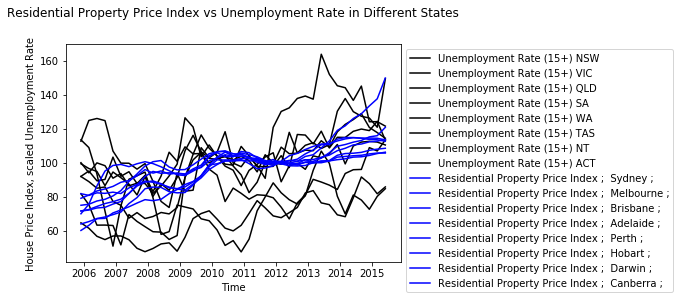

In [302]:
for i in list(range(36,44)):
    plt.plot(big_table[big_table.columns[0]],big_table[big_table.columns[i]]*scale,label=big_table.columns[i]
             ,color='black')
for i in list(range(52,60)):
    plt.plot(big_table[big_table.columns[0]],big_table[big_table.columns[i]],label=big_table.columns[i]
            ,color='blue')

plt.title('Residential Property Price Index vs Unemployment Rate in Different States')
plt.xlabel('Time')
plt.ylabel('House Price Index, scaled Unemployment Rate')    

global_plot_setting()

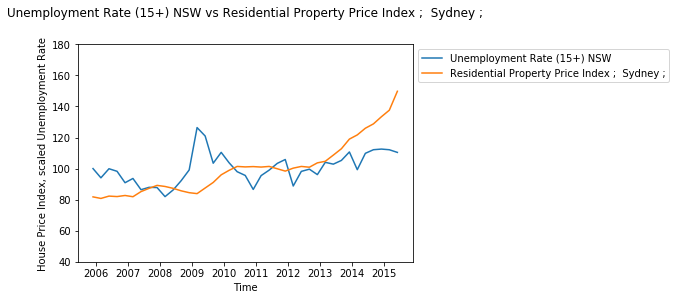

In [284]:
unemploy_index=36
house_price_index=unemploy_index+16
plt.plot(big_table[big_table.columns[0]],big_table[big_table.columns[unemploy_index]]*scale,
         label=big_table.columns[unemploy_index])
plt.plot(big_table[big_table.columns[0]],
         big_table[big_table.columns[house_price_index]],label=big_table.columns[house_price_index])
plt.title(big_table.columns[unemploy_index]+" vs "+big_table.columns[house_price_index])
plt.xlabel('Time')
plt.ylabel('House Price Index, scaled Unemployment Rate')  

global_plot_setting(ylimit=[40,180])

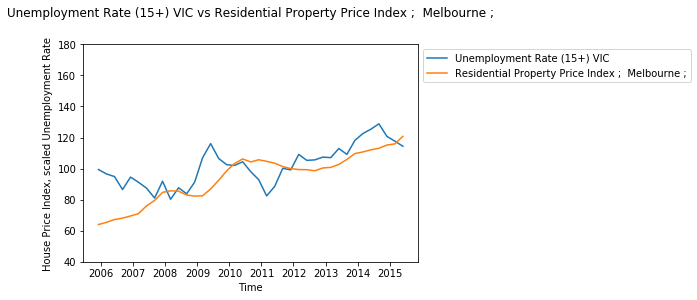

In [285]:
unemploy_index=37
house_price_index=unemploy_index+16
plt.plot(big_table[big_table.columns[0]],big_table[big_table.columns[unemploy_index]]*scale,
         label=big_table.columns[unemploy_index])
plt.plot(big_table[big_table.columns[0]],
         big_table[big_table.columns[house_price_index]],label=big_table.columns[house_price_index])
plt.title(big_table.columns[unemploy_index]+" vs "+big_table.columns[house_price_index])
plt.xlabel('Time')
plt.ylabel('House Price Index, scaled Unemployment Rate')    

global_plot_setting(ylimit=[40,180])

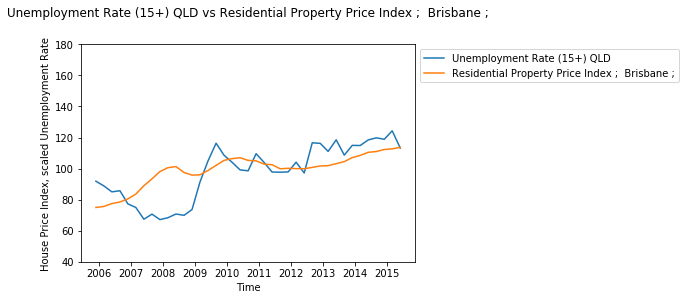

In [286]:
unemploy_index=38
house_price_index=unemploy_index+16
plt.plot(big_table[big_table.columns[0]],big_table[big_table.columns[unemploy_index]]*scale,
         label=big_table.columns[unemploy_index])
plt.plot(big_table[big_table.columns[0]],
         big_table[big_table.columns[house_price_index]],label=big_table.columns[house_price_index])
plt.title(big_table.columns[unemploy_index]+" vs "+big_table.columns[house_price_index])
plt.xlabel('Time')
plt.ylabel('House Price Index, scaled Unemployment Rate')    

global_plot_setting(ylimit=[40,180])

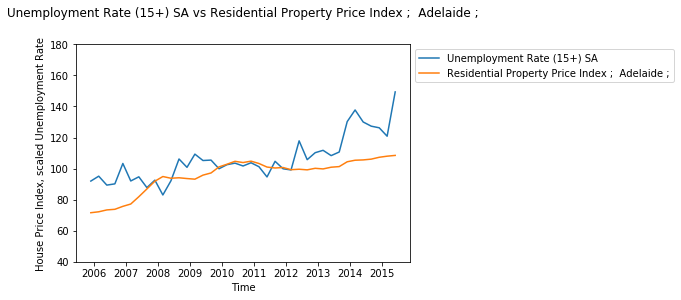

In [287]:
unemploy_index=39
house_price_index=unemploy_index+16
plt.plot(big_table[big_table.columns[0]],big_table[big_table.columns[unemploy_index]]*scale,
         label=big_table.columns[unemploy_index])
plt.plot(big_table[big_table.columns[0]],
         big_table[big_table.columns[house_price_index]],label=big_table.columns[house_price_index])
plt.title(big_table.columns[unemploy_index]+" vs "+big_table.columns[house_price_index])
plt.xlabel('Time')
plt.ylabel('House Price Index, scaled Unemployment Rate')    

global_plot_setting(ylimit=[40,180])

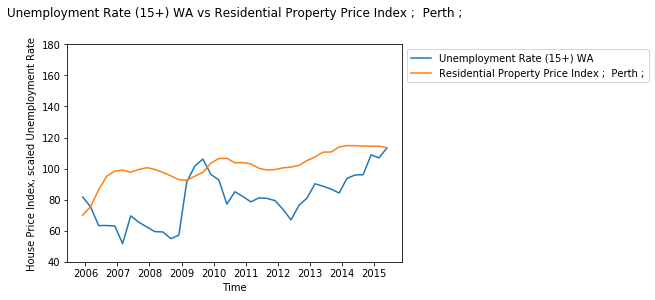

In [288]:
unemploy_index=40
house_price_index=unemploy_index+16
plt.plot(big_table[big_table.columns[0]],big_table[big_table.columns[unemploy_index]]*scale,
         label=big_table.columns[unemploy_index])
plt.plot(big_table[big_table.columns[0]],
         big_table[big_table.columns[house_price_index]],label=big_table.columns[house_price_index])
plt.title(big_table.columns[unemploy_index]+" vs "+big_table.columns[house_price_index])
plt.xlabel('Time')
plt.ylabel('House Price Index, scaled Unemployment Rate')    

global_plot_setting(ylimit=[40,180])

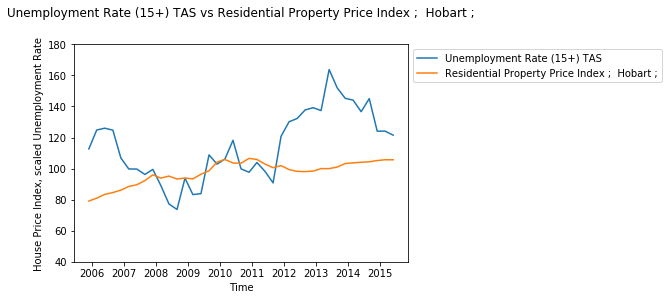

In [289]:
unemploy_index=41
house_price_index=unemploy_index+16
plt.plot(big_table[big_table.columns[0]],big_table[big_table.columns[unemploy_index]]*scale,
         label=big_table.columns[unemploy_index])
plt.plot(big_table[big_table.columns[0]],
         big_table[big_table.columns[house_price_index]],label=big_table.columns[house_price_index])
plt.title(big_table.columns[unemploy_index]+" vs "+big_table.columns[house_price_index])
plt.xlabel('Time')
plt.ylabel('House Price Index, scaled Unemployment Rate')    

global_plot_setting(ylimit=[40,180])

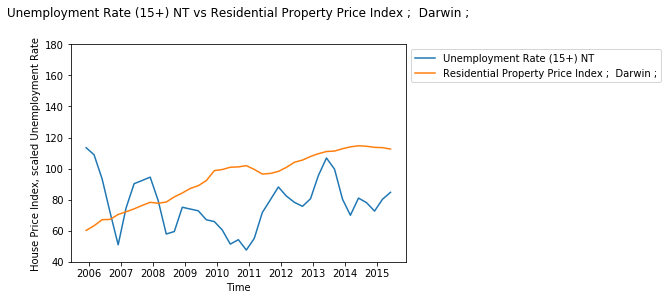

In [290]:
unemploy_index=42
house_price_index=unemploy_index+16
plt.plot(big_table[big_table.columns[0]],big_table[big_table.columns[unemploy_index]]*scale,
         label=big_table.columns[unemploy_index])
plt.plot(big_table[big_table.columns[0]],
         big_table[big_table.columns[house_price_index]],label=big_table.columns[house_price_index])
plt.title(big_table.columns[unemploy_index]+" vs "+big_table.columns[house_price_index])
plt.xlabel('Time')
plt.ylabel('House Price Index, scaled Unemployment Rate')    

global_plot_setting(ylimit=[40,180])

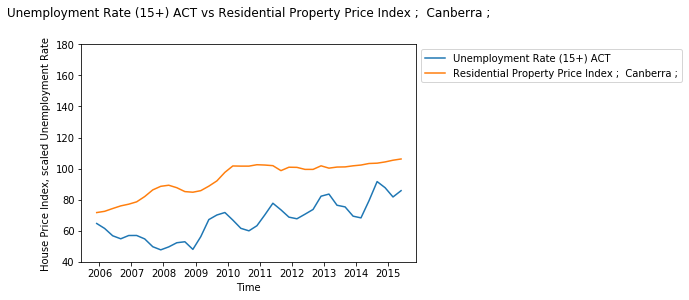

In [291]:
unemploy_index=43
house_price_index=unemploy_index+16
plt.plot(big_table[big_table.columns[0]],big_table[big_table.columns[unemploy_index]]*scale,
         label=big_table.columns[unemploy_index])
plt.plot(big_table[big_table.columns[0]],
         big_table[big_table.columns[house_price_index]],label=big_table.columns[house_price_index])
plt.title(big_table.columns[unemploy_index]+" vs "+big_table.columns[house_price_index])
plt.xlabel('Time')
plt.ylabel('House Price Index, scaled Unemployment Rate')    

global_plot_setting(ylimit=[40,180])

### Employment vs House price index

In [308]:
scale = sum(big_table.iloc[:,52])/sum(big_table.iloc[:,28])
scale

1.4149160294371794

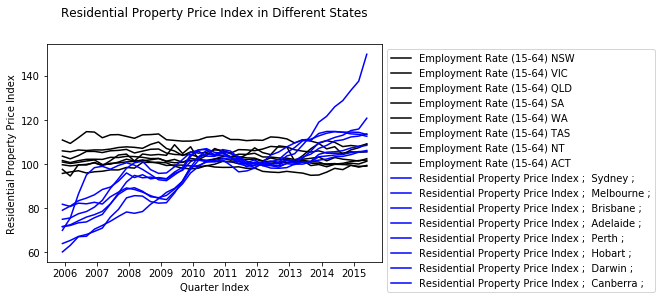

In [297]:
for i in list(range(28,36)):
    plt.plot(big_table[big_table.columns[0]],big_table[big_table.columns[i]]*scale,label=big_table.columns[i]
             ,color='black')
for i in list(range(52,60)):
    plt.plot(big_table[big_table.columns[0]],big_table[big_table.columns[i]],label=big_table.columns[i]
            ,color='blue')

plt.title('House Price Index vs Employment Rate in Different States')
plt.xlabel('Time')
plt.ylabel('House Price Index, scaled employment Rate')    

global_plot_setting()

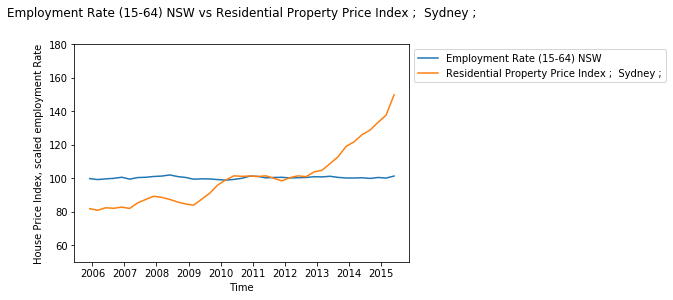

In [318]:
employ_index=28
house_price_index=employ_index+24
plt.plot(big_table[big_table.columns[0]],big_table[big_table.columns[employ_index]]*scale,
         label=big_table.columns[employ_index])
plt.plot(big_table[big_table.columns[0]],
         big_table[big_table.columns[house_price_index]],label=big_table.columns[house_price_index])
plt.title(big_table.columns[employ_index]+" vs "+big_table.columns[house_price_index])
plt.xlabel('Time')
plt.ylabel('House Price Index, scaled employment Rate')  

global_plot_setting(ylimit=[50,180])

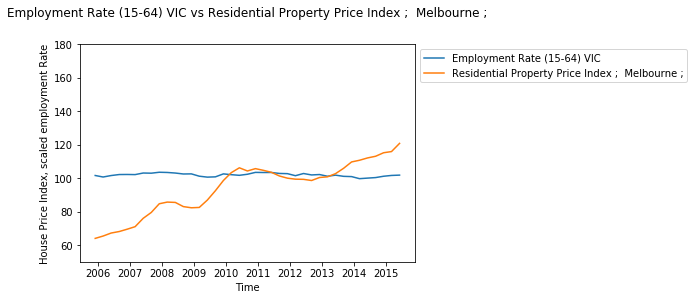

In [319]:
employ_index=29
house_price_index=employ_index+24
plt.plot(big_table[big_table.columns[0]],big_table[big_table.columns[employ_index]]*scale,
         label=big_table.columns[employ_index])
plt.plot(big_table[big_table.columns[0]],
         big_table[big_table.columns[house_price_index]],label=big_table.columns[house_price_index])
plt.title(big_table.columns[employ_index]+" vs "+big_table.columns[house_price_index])
plt.xlabel('Time')
plt.ylabel('House Price Index, scaled employment Rate')  

global_plot_setting(ylimit=[50,180])

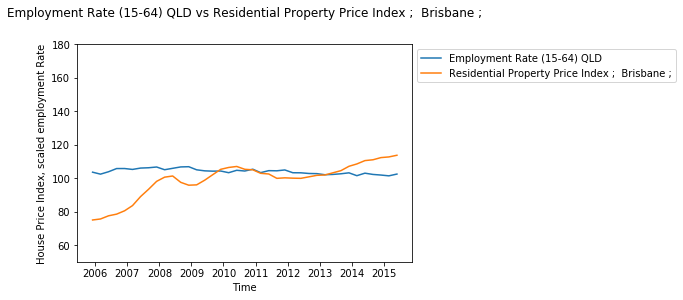

In [320]:
employ_index=30
house_price_index=employ_index+24
plt.plot(big_table[big_table.columns[0]],big_table[big_table.columns[employ_index]]*scale,
         label=big_table.columns[employ_index])
plt.plot(big_table[big_table.columns[0]],
         big_table[big_table.columns[house_price_index]],label=big_table.columns[house_price_index])
plt.title(big_table.columns[employ_index]+" vs "+big_table.columns[house_price_index])
plt.xlabel('Time')
plt.ylabel('House Price Index, scaled employment Rate')  

global_plot_setting(ylimit=[50,180])

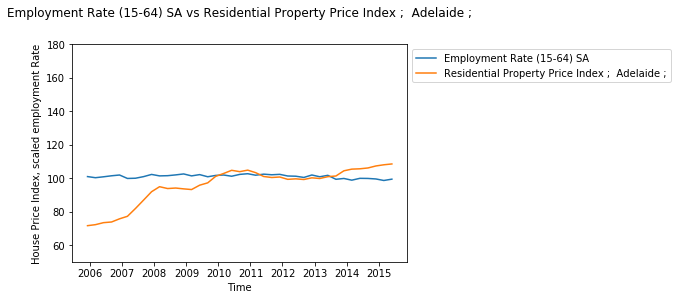

In [321]:
employ_index=31
house_price_index=employ_index+24
plt.plot(big_table[big_table.columns[0]],big_table[big_table.columns[employ_index]]*scale,
         label=big_table.columns[employ_index])
plt.plot(big_table[big_table.columns[0]],
         big_table[big_table.columns[house_price_index]],label=big_table.columns[house_price_index])
plt.title(big_table.columns[employ_index]+" vs "+big_table.columns[house_price_index])
plt.xlabel('Time')
plt.ylabel('House Price Index, scaled employment Rate')  

global_plot_setting(ylimit=[50,180])

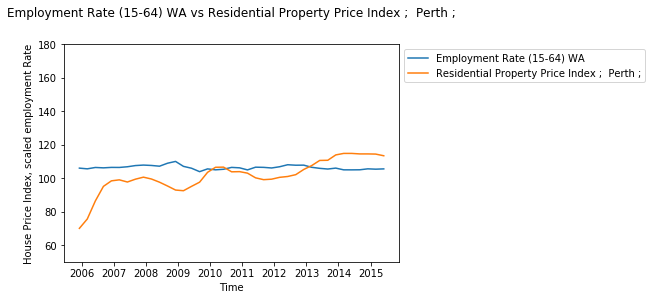

In [322]:
employ_index=32
house_price_index=employ_index+24
plt.plot(big_table[big_table.columns[0]],big_table[big_table.columns[employ_index]]*scale,
         label=big_table.columns[employ_index])
plt.plot(big_table[big_table.columns[0]],
         big_table[big_table.columns[house_price_index]],label=big_table.columns[house_price_index])
plt.title(big_table.columns[employ_index]+" vs "+big_table.columns[house_price_index])
plt.xlabel('Time')
plt.ylabel('House Price Index, scaled employment Rate')  

global_plot_setting(ylimit=[50,180])

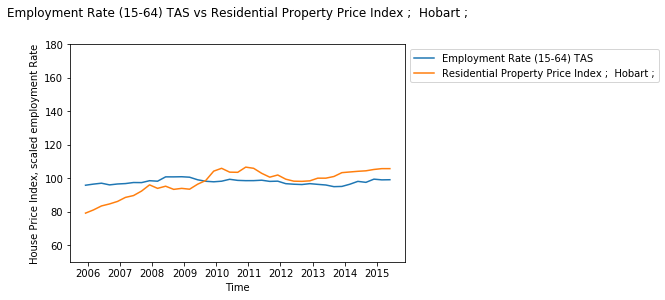

In [323]:
employ_index=33
house_price_index=employ_index+24
plt.plot(big_table[big_table.columns[0]],big_table[big_table.columns[employ_index]]*scale,
         label=big_table.columns[employ_index])
plt.plot(big_table[big_table.columns[0]],
         big_table[big_table.columns[house_price_index]],label=big_table.columns[house_price_index])
plt.title(big_table.columns[employ_index]+" vs "+big_table.columns[house_price_index])
plt.xlabel('Time')
plt.ylabel('House Price Index, scaled employment Rate')  

global_plot_setting(ylimit=[50,180])

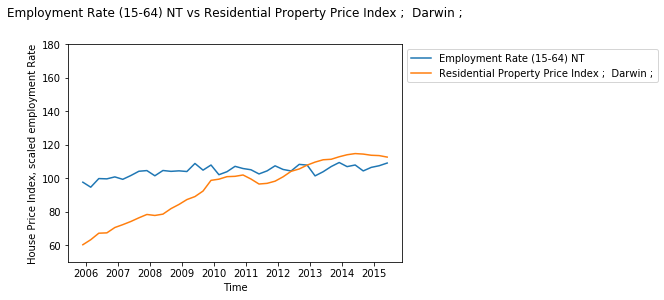

In [324]:
employ_index=34
house_price_index=employ_index+24
plt.plot(big_table[big_table.columns[0]],big_table[big_table.columns[employ_index]]*scale,
         label=big_table.columns[employ_index])
plt.plot(big_table[big_table.columns[0]],
         big_table[big_table.columns[house_price_index]],label=big_table.columns[house_price_index])
plt.title(big_table.columns[employ_index]+" vs "+big_table.columns[house_price_index])
plt.xlabel('Time')
plt.ylabel('House Price Index, scaled employment Rate')  

global_plot_setting(ylimit=[50,180])

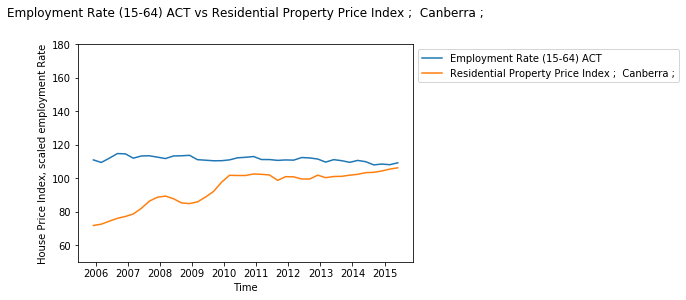

In [325]:
employ_index=35
house_price_index=employ_index+24
plt.plot(big_table[big_table.columns[0]],big_table[big_table.columns[employ_index]]*scale,
         label=big_table.columns[employ_index])
plt.plot(big_table[big_table.columns[0]],
         big_table[big_table.columns[house_price_index]],label=big_table.columns[house_price_index])
plt.title(big_table.columns[employ_index]+" vs "+big_table.columns[house_price_index])
plt.xlabel('Time')
plt.ylabel('House Price Index, scaled employment Rate')  

global_plot_setting(ylimit=[50,180])

### Participation Rate vs House price index

In [329]:
scale = sum(big_table.iloc[:,52])/sum(big_table.iloc[:,44])
scale

1.5829032099147209

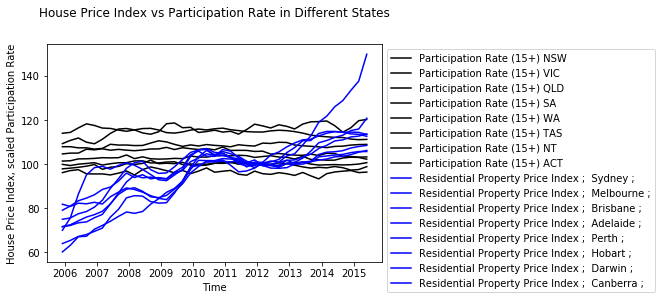

In [330]:
for i in list(range(44,52)):
    plt.plot(big_table[big_table.columns[0]],big_table[big_table.columns[i]]*scale,label=big_table.columns[i]
             ,color='black')
for i in list(range(52,60)):
    plt.plot(big_table[big_table.columns[0]],big_table[big_table.columns[i]],label=big_table.columns[i]
            ,color='blue')

plt.title('House Price Index vs Participation Rate in Different States')
plt.xlabel('Time')
plt.ylabel('House Price Index, scaled Participation Rate')    

global_plot_setting()

### Population vs House price index

In [342]:
scale = sum(big_table.iloc[:,52])/sum(big_table.iloc[:,19])
scale

1.4009845389375793e-05

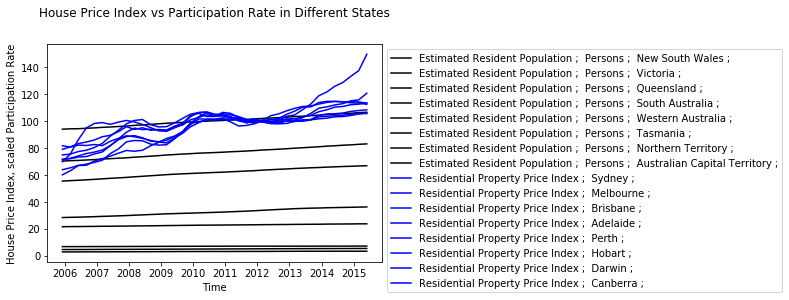

In [343]:
for i in list(range(19,27)):
    plt.plot(big_table[big_table.columns[0]],big_table[big_table.columns[i]]*scale,label=big_table.columns[i]
             ,color='black')
for i in list(range(52,60)):
    plt.plot(big_table[big_table.columns[0]],big_table[big_table.columns[i]],label=big_table.columns[i]
            ,color='blue')

plt.title('House Price Index vs Participation Rate in Different States')
plt.xlabel('Time')
plt.ylabel('House Price Index, scaled Participation Rate')    

global_plot_setting()

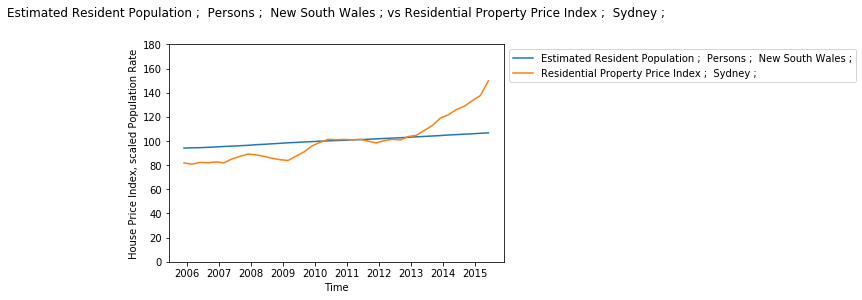

In [352]:
population_index=19
house_price_index=population_index+33
plt.plot(big_table[big_table.columns[0]],big_table[big_table.columns[population_index]]*scale,
         label=big_table.columns[population_index])
plt.plot(big_table[big_table.columns[0]],
         big_table[big_table.columns[house_price_index]],label=big_table.columns[house_price_index])
plt.title(big_table.columns[population_index]+" vs "+big_table.columns[house_price_index])
plt.xlabel('Time')
plt.ylabel('House Price Index, scaled Population Rate')  

global_plot_setting(ylimit=[0,180])

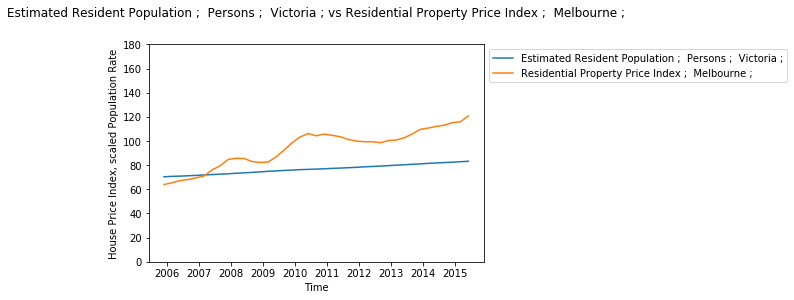

In [353]:
population_index=20
house_price_index=population_index+33
plt.plot(big_table[big_table.columns[0]],big_table[big_table.columns[population_index]]*scale,
         label=big_table.columns[population_index])
plt.plot(big_table[big_table.columns[0]],
         big_table[big_table.columns[house_price_index]],label=big_table.columns[house_price_index])
plt.title(big_table.columns[population_index]+" vs "+big_table.columns[house_price_index])
plt.xlabel('Time')
plt.ylabel('House Price Index, scaled Population Rate')  

global_plot_setting(ylimit=[0,180])

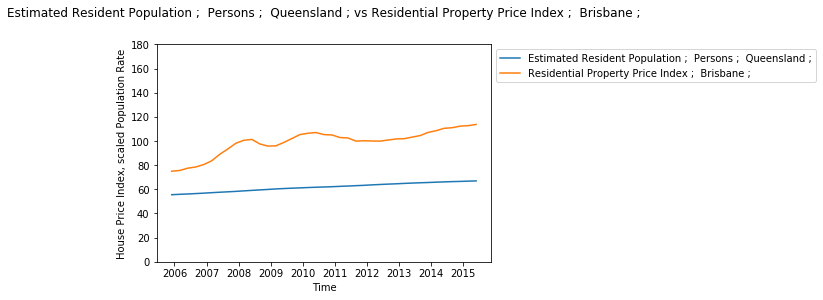

In [354]:
population_index=21
house_price_index=population_index+33
plt.plot(big_table[big_table.columns[0]],big_table[big_table.columns[population_index]]*scale,
         label=big_table.columns[population_index])
plt.plot(big_table[big_table.columns[0]],
         big_table[big_table.columns[house_price_index]],label=big_table.columns[house_price_index])
plt.title(big_table.columns[population_index]+" vs "+big_table.columns[house_price_index])
plt.xlabel('Time')
plt.ylabel('House Price Index, scaled Population Rate')  

global_plot_setting(ylimit=[0,180])

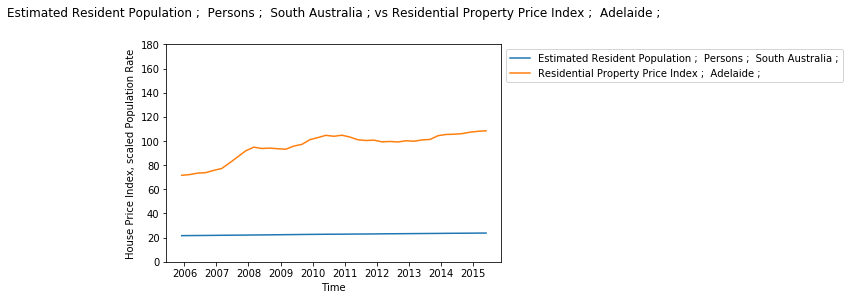

In [355]:
population_index=22
house_price_index=population_index+33
plt.plot(big_table[big_table.columns[0]],big_table[big_table.columns[population_index]]*scale,
         label=big_table.columns[population_index])
plt.plot(big_table[big_table.columns[0]],
         big_table[big_table.columns[house_price_index]],label=big_table.columns[house_price_index])
plt.title(big_table.columns[population_index]+" vs "+big_table.columns[house_price_index])
plt.xlabel('Time')
plt.ylabel('House Price Index, scaled Population Rate')  

global_plot_setting(ylimit=[0,180])

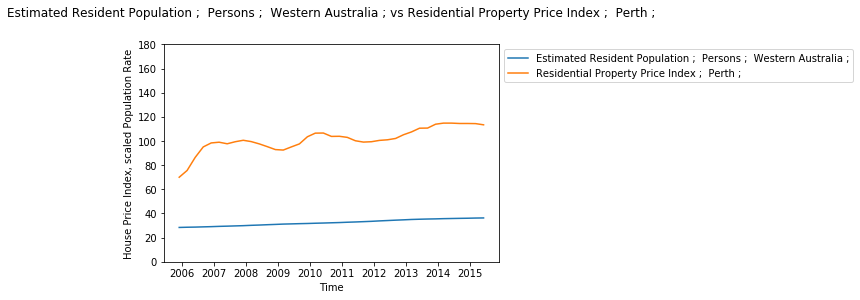

In [356]:
population_index=23
house_price_index=population_index+33
plt.plot(big_table[big_table.columns[0]],big_table[big_table.columns[population_index]]*scale,
         label=big_table.columns[population_index])
plt.plot(big_table[big_table.columns[0]],
         big_table[big_table.columns[house_price_index]],label=big_table.columns[house_price_index])
plt.title(big_table.columns[population_index]+" vs "+big_table.columns[house_price_index])
plt.xlabel('Time')
plt.ylabel('House Price Index, scaled Population Rate')  

global_plot_setting(ylimit=[0,180])

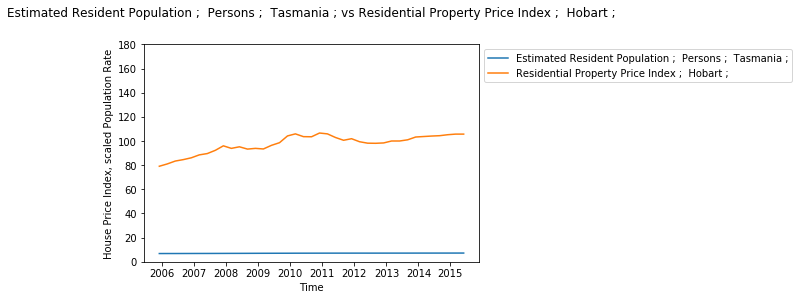

In [357]:
population_index=24
house_price_index=population_index+33
plt.plot(big_table[big_table.columns[0]],big_table[big_table.columns[population_index]]*scale,
         label=big_table.columns[population_index])
plt.plot(big_table[big_table.columns[0]],
         big_table[big_table.columns[house_price_index]],label=big_table.columns[house_price_index])
plt.title(big_table.columns[population_index]+" vs "+big_table.columns[house_price_index])
plt.xlabel('Time')
plt.ylabel('House Price Index, scaled Population Rate')  

global_plot_setting(ylimit=[0,180])

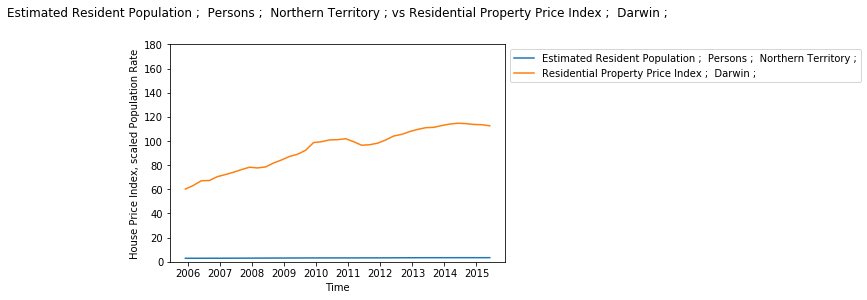

In [358]:
population_index=25
house_price_index=population_index+33
plt.plot(big_table[big_table.columns[0]],big_table[big_table.columns[population_index]]*scale,
         label=big_table.columns[population_index])
plt.plot(big_table[big_table.columns[0]],
         big_table[big_table.columns[house_price_index]],label=big_table.columns[house_price_index])
plt.title(big_table.columns[population_index]+" vs "+big_table.columns[house_price_index])
plt.xlabel('Time')
plt.ylabel('House Price Index, scaled Population Rate')  

global_plot_setting(ylimit=[0,180])

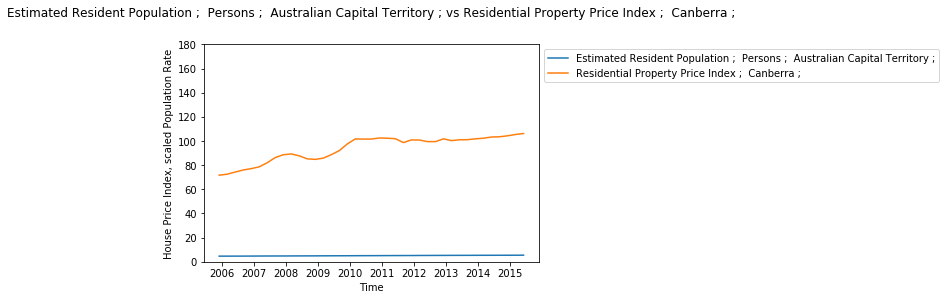

In [359]:
population_index=26
house_price_index=population_index+33
plt.plot(big_table[big_table.columns[0]],big_table[big_table.columns[population_index]]*scale,
         label=big_table.columns[population_index])
plt.plot(big_table[big_table.columns[0]],
         big_table[big_table.columns[house_price_index]],label=big_table.columns[house_price_index])
plt.title(big_table.columns[population_index]+" vs "+big_table.columns[house_price_index])
plt.xlabel('Time')
plt.ylabel('House Price Index, scaled Population Rate')  

global_plot_setting(ylimit=[0,180])

### Population vs Unemployment rate

In [525]:
scale = sum(big_table.iloc[:,37])/sum(big_table.iloc[:,20])
scale

9.842275679656245e-07

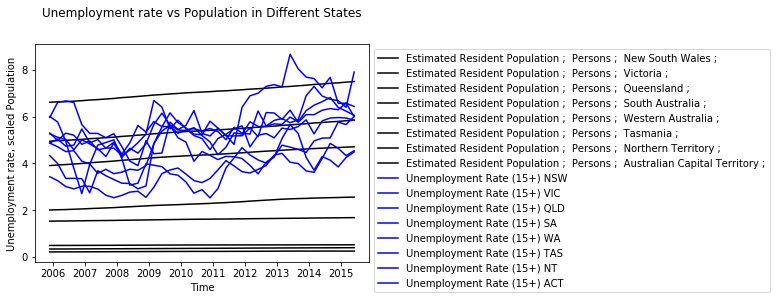

In [538]:
for i in list(range(19,27)):
    plt.plot(big_table[big_table.columns[0]],big_table[big_table.columns[i]]*scale,label=big_table.columns[i]
             ,color='black')
for i in list(range(36,44)):
    plt.plot(big_table[big_table.columns[0]],big_table[big_table.columns[i]],label=big_table.columns[i]
            ,color='blue')

plt.title('Unemployment rate vs Population in Different States')
plt.xlabel('Time')
plt.ylabel('Unemployment rate, scaled Population')    

global_plot_setting()

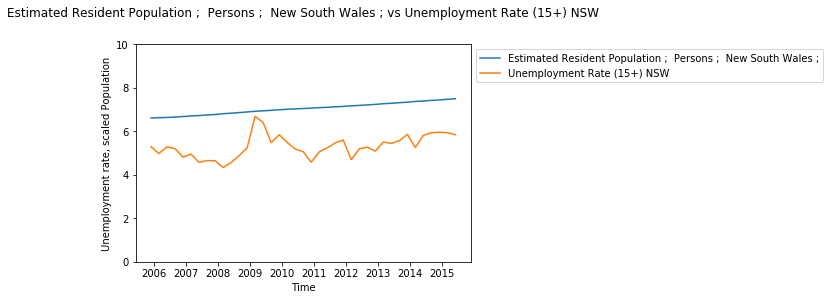

In [539]:
population_index=19
unemploy_index=population_index+17
plt.plot(big_table[big_table.columns[0]],big_table[big_table.columns[population_index]]*scale,
         label=big_table.columns[population_index])
plt.plot(big_table[big_table.columns[0]],
         big_table[big_table.columns[unemploy_index]],label=big_table.columns[unemploy_index])
plt.title(big_table.columns[population_index]+" vs "+big_table.columns[unemploy_index])
plt.xlabel('Time')
plt.ylabel('Unemployment rate, scaled Population')  

global_plot_setting(ylimit=[0,10])

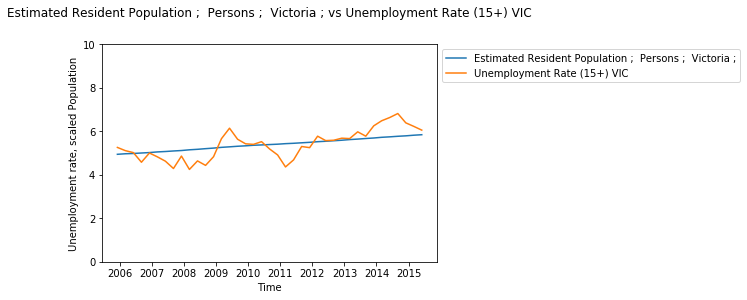

In [540]:
population_index=20
unemploy_index=population_index+17
plt.plot(big_table[big_table.columns[0]],big_table[big_table.columns[population_index]]*scale,
         label=big_table.columns[population_index])
plt.plot(big_table[big_table.columns[0]],
         big_table[big_table.columns[unemploy_index]],label=big_table.columns[unemploy_index])
plt.title(big_table.columns[population_index]+" vs "+big_table.columns[unemploy_index])
plt.xlabel('Time')
plt.ylabel('Unemployment rate, scaled Population')  

global_plot_setting(ylimit=[0,10])

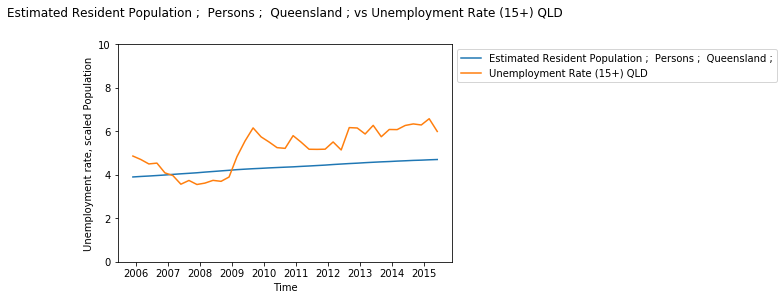

In [541]:
population_index=21
unemploy_index=population_index+17
plt.plot(big_table[big_table.columns[0]],big_table[big_table.columns[population_index]]*scale,
         label=big_table.columns[population_index])
plt.plot(big_table[big_table.columns[0]],
         big_table[big_table.columns[unemploy_index]],label=big_table.columns[unemploy_index])
plt.title(big_table.columns[population_index]+" vs "+big_table.columns[unemploy_index])
plt.xlabel('Time')
plt.ylabel('Unemployment rate, scaled Population')  

global_plot_setting(ylimit=[0,10])

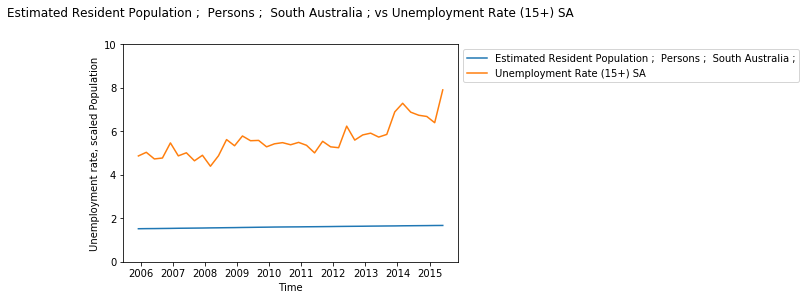

In [542]:
population_index=22
unemploy_index=population_index+17
plt.plot(big_table[big_table.columns[0]],big_table[big_table.columns[population_index]]*scale,
         label=big_table.columns[population_index])
plt.plot(big_table[big_table.columns[0]],
         big_table[big_table.columns[unemploy_index]],label=big_table.columns[unemploy_index])
plt.title(big_table.columns[population_index]+" vs "+big_table.columns[unemploy_index])
plt.xlabel('Time')
plt.ylabel('Unemployment rate, scaled Population')  

global_plot_setting(ylimit=[0,10])

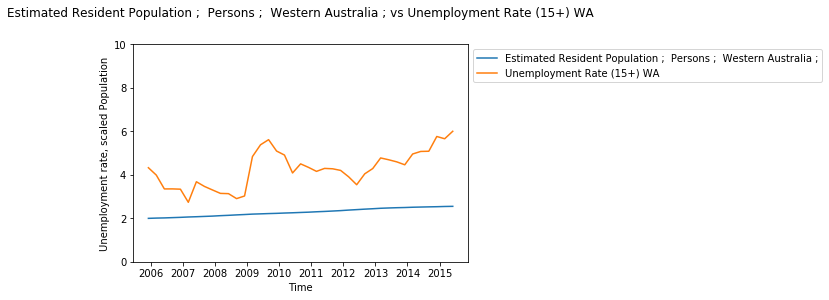

In [543]:
population_index=23
unemploy_index=population_index+17
plt.plot(big_table[big_table.columns[0]],big_table[big_table.columns[population_index]]*scale,
         label=big_table.columns[population_index])
plt.plot(big_table[big_table.columns[0]],
         big_table[big_table.columns[unemploy_index]],label=big_table.columns[unemploy_index])
plt.title(big_table.columns[population_index]+" vs "+big_table.columns[unemploy_index])
plt.xlabel('Time')
plt.ylabel('Unemployment rate, scaled Population')  

global_plot_setting(ylimit=[0,10])

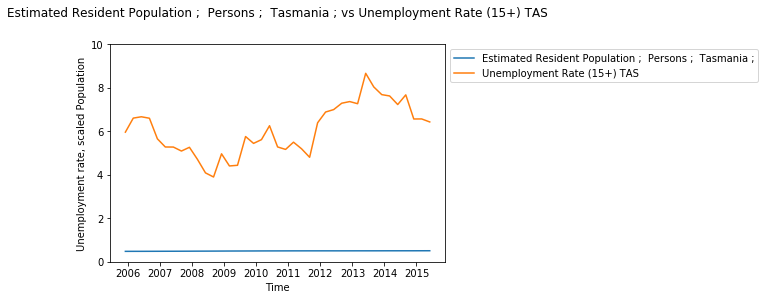

In [544]:
population_index=24
unemploy_index=population_index+17
plt.plot(big_table[big_table.columns[0]],big_table[big_table.columns[population_index]]*scale,
         label=big_table.columns[population_index])
plt.plot(big_table[big_table.columns[0]],
         big_table[big_table.columns[unemploy_index]],label=big_table.columns[unemploy_index])
plt.title(big_table.columns[population_index]+" vs "+big_table.columns[unemploy_index])
plt.xlabel('Time')
plt.ylabel('Unemployment rate, scaled Population')  

global_plot_setting(ylimit=[0,10])

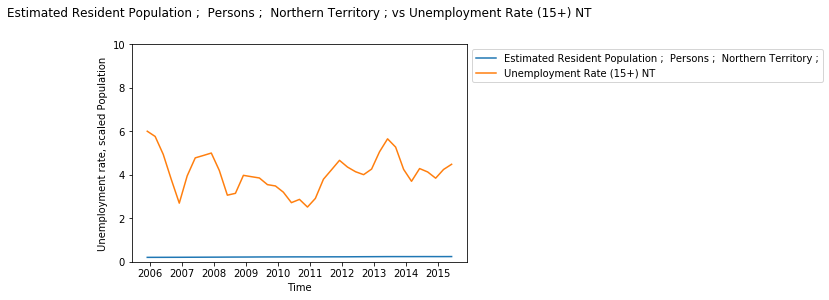

In [545]:
population_index=25
unemploy_index=population_index+17
plt.plot(big_table[big_table.columns[0]],big_table[big_table.columns[population_index]]*scale,
         label=big_table.columns[population_index])
plt.plot(big_table[big_table.columns[0]],
         big_table[big_table.columns[unemploy_index]],label=big_table.columns[unemploy_index])
plt.title(big_table.columns[population_index]+" vs "+big_table.columns[unemploy_index])
plt.xlabel('Time')
plt.ylabel('Unemployment rate, scaled Population')  

global_plot_setting(ylimit=[0,10])

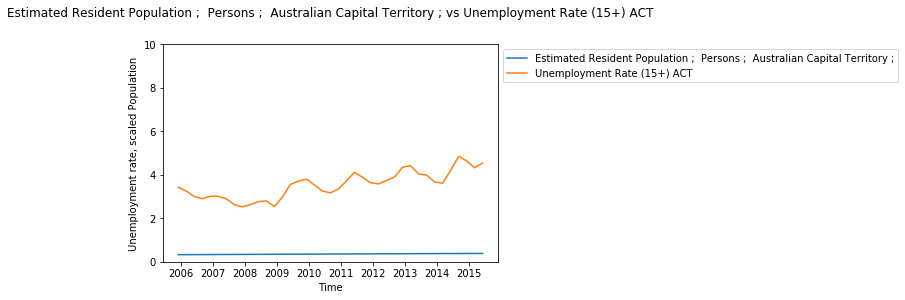

In [546]:
population_index=26
unemploy_index=population_index+17
plt.plot(big_table[big_table.columns[0]],big_table[big_table.columns[population_index]]*scale,
         label=big_table.columns[population_index])
plt.plot(big_table[big_table.columns[0]],
         big_table[big_table.columns[unemploy_index]],label=big_table.columns[unemploy_index])
plt.title(big_table.columns[population_index]+" vs "+big_table.columns[unemploy_index])
plt.xlabel('Time')
plt.ylabel('Unemployment rate, scaled Population')  

global_plot_setting(ylimit=[0,10])

## Motion Chart

In [360]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [369]:
states=['New South Wales',' Victoria','Queensland','South Australia','Western Australia',
       'Tasmania','Northern Territory','Australian Capital Territory']

In [361]:
big_table.head(5)

,Date,Estimated Resident Population ; Male ; New South Wales ;,Estimated Resident Population ; Male ; Victoria ;,Estimated Resident Population ; Male ; Queensland ;,Estimated Resident Population ; Male ; South Australia ;,Estimated Resident Population ; Male ; Western Australia ;,Estimated Resident Population ; Male ; Tasmania ;,Estimated Resident Population ; Male ; Northern Territory ;,Estimated Resident Population ; Male ; Australian Capital Territory ;,Estimated Resident Population ; Male ; Australia ;,...,Participation Rate (15+) NT,Participation Rate (15+) ACT,Residential Property Price Index ; Sydney ;,Residential Property Price Index ; Melbourne ;,Residential Property Price Index ; Brisbane ;,Residential Property Price Index ; Adelaide ;,Residential Property Price Index ; Perth ;,Residential Property Price Index ; Hobart ;,Residential Property Price Index ; Darwin ;,Residential Property Price Index ; Canberra ;
0,2005-12-01,3327461,2481962,1977783,762665,1022918,240625,107839,164850,10087382,...,69.041774,72.006718,81.8,64.0,75.0,71.6,70.0,79.1,60.2,71.7
1,2006-03-01,3336005,2495951,1989764,765272,1030021,241193,108137,165351,10132982,...,69.963363,72.257139,80.8,65.4,75.6,72.2,75.6,81.0,63.2,72.5
2,2006-06-01,3339035,2502687,1999858,766432,1034567,241227,108502,165814,10159424,...,70.651375,73.554351,82.3,67.2,77.5,73.4,86.4,83.4,67.1,74.3
3,2006-09-01,3351254,2514544,2011909,768884,1040869,241864,109220,166549,10206440,...,69.450352,74.704801,82.0,68.1,78.5,73.8,95.1,84.6,67.3,76.0
4,2006-12-01,3361292,2524859,2023921,770847,1047061,242549,109586,167405,10248923,...,68.997555,74.240881,82.7,69.5,80.5,75.7,98.4,86.1,70.5,77.1


In [382]:
tmp=big_table.iloc[:,52:]
tmp.columns=states
tmp['Date'] = big_table['Date']
tmp_h = pd.melt(tmp, id_vars=['Date'],value_vars=states,var_name='State')
tmp_h.rename(columns = {'value':'House Price Index'}, inplace = True)

In [385]:
tmp=big_table.iloc[:,36:44]
tmp.columns=states
tmp['Date'] = big_table['Date']
tmp_u = pd.melt(tmp, id_vars=['Date'],value_vars=states,var_name='State')
tmp_u.rename(columns = {'value':'Unemployment Rate'}, inplace = True)

In [388]:
tmp=big_table.iloc[:,19:27]
tmp.columns=states
tmp['Date'] = big_table['Date']
tmp_p = pd.melt(tmp, id_vars=['Date'],value_vars=states,var_name='State')
tmp_p.rename(columns = {'value':'Population'}, inplace = True)

In [390]:
motion_table= pd.merge(tmp_h, tmp_p, on=['Date','State'])
motion_table = pd.merge(motion_table, tmp_u, on=['Date','State'])
motion_table.head()

,Date,State,House Price Index,Population,Unemployment Rate
0,2005-12-01,New South Wales,81.8,6718023,5.293757
1,2006-03-01,New South Wales,80.8,6735528,4.978780
2,2006-06-01,New South Wales,82.3,6742690,5.288439
3,2006-09-01,New South Wales,82.0,6766133,5.200780
4,2006-12-01,New South Wales,82.7,6786160,4.811675


In [553]:
motion_table['Date'] = motion_table.Date.apply(lambda x: datetime.datetime.strftime(x, '%d/%m/%y'))

In [567]:
motion_table.head()

,Date,State,House Price Index,Population,Unemployment Rate
0,01/12/05,New South Wales,81.8,6718023,5.293757
1,01/03/06,New South Wales,80.8,6735528,4.978780
2,01/06/06,New South Wales,82.3,6742690,5.288439
3,01/09/06,New South Wales,82.0,6766133,5.200780
4,01/12/06,New South Wales,82.7,6786160,4.811675


In [554]:
mChart = MotionChart(df = motion_table, key='Date', x='Unemployment Rate', y='House Price Index', xscale='linear', yscale='linear',
                     size='Population', color='State', category='State')

mChart.to_notebook()

In [555]:
motion_table.to_csv('task1.csv')

# Task2

In [ ]:
#url: https://www.data.gov.au/dataset/domestic-airline-on-time-performance

In [395]:
airlines=pd.read_csv('domestic_airlines.csv')

In [396]:
airlines.shape

(71412, 14)

In [405]:
airlines.isnull().any()

Route                 False
Departing_Port        False
Arriving_Port         False
Airline               False
Month                 False
Sectors_Scheduled     False
Sectors_Flown         False
Cancellations          True
Departures_On_Time    False
Arrivals_On_Time      False
Departures_Delayed     True
Arrivals_Delayed      False
Year                  False
Month_Num             False
dtype: bool

In [408]:
airlines[pd.isnull(airlines.Departures_Delayed)]

,Route,Departing_Port,Arriving_Port,Airline,Month,Sectors_Scheduled,Sectors_Flown,Cancellations,Departures_On_Time,Arrivals_On_Time,Departures_Delayed,Arrivals_Delayed,Year,Month_Num
4619,Melbourne-Hobart,Melbourne,Hobart,Jetstar,38443,150.0,150,0.0,150.0,126.0,NaN,24.0,2005,4
4620,Melbourne-Launceston,Melbourne,Launceston,Jetstar,38443,120.0,120,0.0,120.0,107.0,NaN,13.0,2005,4
4622,Melbourne-Sunshine Coast,Melbourne,Sunshine Coast,Jetstar,38443,60.0,60,0.0,60.0,55.0,NaN,5.0,2005,4
14223,Sydney-Launceston,Sydney,Launceston,Jetstar,39326,30.0,30,0.0,30.0,28.0,NaN,2.0,2007,9
14583,Melbourne-Cairns,Melbourne,Cairns,Qantas,39356,31.0,31,0.0,31.0,29.0,NaN,2.0,2007,10


In [412]:
airlines.fillna(0,inplace=True)
airlines.isnull().any()

Route                 False
Departing_Port        False
Arriving_Port         False
Airline               False
Month                 False
Sectors_Scheduled     False
Sectors_Flown         False
Cancellations         False
Departures_On_Time    False
Arrivals_On_Time      False
Departures_Delayed    False
Arrivals_Delayed      False
Year                  False
Month_Num             False
dtype: bool

In [400]:
airlines.head(5)

,Route,Departing_Port,Arriving_Port,Airline,Month,Sectors_Scheduled,Sectors_Flown,Cancellations,Departures_On_Time,Arrivals_On_Time,Departures_Delayed,Arrivals_Delayed,Year,Month_Num
0,Adelaide-Brisbane,Adelaide,Brisbane,All Airlines,37987,155.0,155,0.0,123.0,120.0,32.0,35.0,2004,1
1,Adelaide-Canberra,Adelaide,Canberra,All Airlines,37987,75.0,75,0.0,72.0,72.0,3.0,3.0,2004,1
2,Adelaide-Gold Coast,Adelaide,Gold Coast,All Airlines,37987,40.0,40,0.0,36.0,35.0,4.0,5.0,2004,1
3,Adelaide-Melbourne,Adelaide,Melbourne,All Airlines,37987,550.0,548,2.0,478.0,487.0,70.0,61.0,2004,1
4,Adelaide-Perth,Adelaide,Perth,All Airlines,37987,191.0,191,0.0,169.0,168.0,22.0,23.0,2004,1


In [413]:
airlines.columns

Index(['Route', 'Departing_Port', 'Arriving_Port', 'Airline', 'Month',
       'Sectors_Scheduled', 'Sectors_Flown', 'Cancellations',
       'Departures_On_Time', 'Arrivals_On_Time', 'Departures_Delayed',
       'Arrivals_Delayed', 'Year', 'Month_Num'],
      dtype='object')

In [478]:
airlines_2=airlines.groupby(['Airline','Month'])['Sectors_Scheduled', 'Sectors_Flown', 'Cancellations',
       'Departures_On_Time', 'Arrivals_On_Time', 'Departures_Delayed',
       'Arrivals_Delayed']
airlines_2=airlines_2.sum()
airlines_2

Sectors_Scheduled  Sectors_Flown  \
Airline                            Month                                     
All Airlines                       37987            54081.0          53714   
                                   38018            52325.0          52010   
                                   38047            57215.0          56821   
                                   38078            55555.0          55170   
                                   38108            58430.0          57951   
                                   38139            57711.0          57327   
                                   38169            61237.0          60632   
                                   38200            61702.0          61245   
                                   38231            61396.0          60572   
                                   38261            62478.0          61980   
                                   38292            60827.0          60374   
                                   38322            62556.0          61928   
                                   38353            59682.0          59138   
                                   38384            56124.0          55396   
                                   38412            61540.0          60975   
                                   38443            60044.0          59630   
                                   38473            62094.0          61140   
                                   38504            60709.0          59938   
                                   38534            64139.0          63529   
                                   38565            64660.0          64206   
                                   38596            63283.0          62847   
                                   38626            64162.0          63639   
                                   38657            62262.0          61677   
                                   38687            62358.0          61673   
                                   38718            60740.0          60142   
                                   38749            58383.0          57940   
                                   38777            65388.0          64761   
                                   38808            62138.0          61482   
                                   38838            65125.0          64532   
                                   38869            63291.0          62147   
...                                                     ...            ...   
Virgin Australia Regional Airlines 42248             4476.0           4224   
                                   42278             4543.0           4470   
                                   42309             4411.0           4349   
                                   42339             4223.0           4123   
                                   42370             1064.0           1051   
                                   42401             1133.0           1131   
                                   42430              926.0            919   
                                   42461             1082.0           1076   
                                   42491             1110.0           1100   
                                   42522             1073.0           1048   
                                   42552             1190.0           1175   
                                   42583             1218.0           1208   
                                   42614             1271.0           1241   
                                   42644             1288.0           1264   
                                   42675             1163.0           1153   
                                   42705             1206.0           1196   
                                   42736             1169.0           1145   
                                   42767             1063.0           1045   
                                   42795             1236.0     

In [479]:
airlines_2.columns

Index(['Sectors_Scheduled', 'Sectors_Flown', 'Cancellations',
       'Departures_On_Time', 'Arrivals_On_Time', 'Departures_Delayed',
       'Arrivals_Delayed'],
      dtype='object')

In [480]:
airlines_2['tmp']=airlines_2.index

In [481]:
airlines_2.head()

Sectors_Scheduled  Sectors_Flown  Cancellations  \
Airline      Month                                                    
All Airlines 37987            54081.0          53714          367.0   
             38018            52325.0          52010          311.0   
             38047            57215.0          56821          394.0   
             38078            55555.0          55170          385.0   
             38108            58430.0          57951          479.0   

                    Departures_On_Time  Arrivals_On_Time  Departures_Delayed  \
Airline      Month                                                             
All Airlines 37987             46781.0           46722.0              6937.0   
             38018             47157.0           46817.0              4856.0   
             38047             52185.0           52051.0              4636.0   
             38078             49566.0           49747.0              5610.0   
             38108             53393.0           53383.0              4538.0   

                    Arrivals_Delayed                    tmp  
Airline      Month                                           
All Airlines 37987            6996.0  (All Airlines, 37987)  
             38018            5166.0  (All Airlines, 38018)  
             38047            4768.0  (All Airlines, 38047)  
             38078            5429.0  (All Airlines, 38078)  
             38108            4540.0  (All Airlines, 38108)

In [482]:
airlines_2['Time']= [airlines_2['tmp'][i][1] for i in range(len(airlines_2['tmp'].index))]

In [483]:
airlines_2['Airline']= [airlines_2['tmp'][i][0] for i in range(len(airlines_2['tmp'].index))]

In [484]:
airlines_2

Sectors_Scheduled  Sectors_Flown  \
Airline                            Month                                     
All Airlines                       37987            54081.0          53714   
                                   38018            52325.0          52010   
                                   38047            57215.0          56821   
                                   38078            55555.0          55170   
                                   38108            58430.0          57951   
                                   38139            57711.0          57327   
                                   38169            61237.0          60632   
                                   38200            61702.0          61245   
                                   38231            61396.0          60572   
                                   38261            62478.0          61980   
                                   38292            60827.0          60374   
                                   38322            62556.0          61928   
                                   38353            59682.0          59138   
                                   38384            56124.0          55396   
                                   38412            61540.0          60975   
                                   38443            60044.0          59630   
                                   38473            62094.0          61140   
                                   38504            60709.0          59938   
                                   38534            64139.0          63529   
                                   38565            64660.0          64206   
                                   38596            63283.0          62847   
                                   38626            64162.0          63639   
                                   38657            62262.0          61677   
                                   38687            62358.0          61673   
                                   38718            60740.0          60142   
                                   38749            58383.0          57940   
                                   38777            65388.0          64761   
                                   38808            62138.0          61482   
                                   38838            65125.0          64532   
                                   38869            63291.0          62147   
...                                                     ...            ...   
Virgin Australia Regional Airlines 42248             4476.0           4224   
                                   42278             4543.0           4470   
                                   42309             4411.0           4349   
                                   42339             4223.0           4123   
                                   42370             1064.0           1051   
                                   42401             1133.0           1131   
                                   42430              926.0            919   
                                   42461             1082.0           1076   
                                   42491             1110.0           1100   
                                   42522             1073.0           1048   
                                   42552             1190.0           1175   
                                   42583             1218.0           1208   
                                   42614             1271.0           1241   
                                   42644             1288.0           1264   
                                   42675             1163.0           1153   
                                   42705             1206.0           1196   
                                   42736             1169.0           1145   
                                   42767             1063.0           1045   
                                   42795             1236.0     

In [489]:
airlines_2=airlines_2.reset_index(drop=True)
del airlines_2['tmp']
airlines_2.head(5)

,Sectors_Scheduled,Sectors_Flown,Cancellations,Departures_On_Time,Arrivals_On_Time,Departures_Delayed,Arrivals_Delayed,Time,Airline
0,54081.0,53714,367.0,46781.0,46722.0,6937.0,6996.0,37987,All Airlines
1,52325.0,52010,311.0,47157.0,46817.0,4856.0,5166.0,38018,All Airlines
2,57215.0,56821,394.0,52185.0,52051.0,4636.0,4768.0,38047,All Airlines
3,55555.0,55170,385.0,49566.0,49747.0,5610.0,5429.0,38078,All Airlines
4,58430.0,57951,479.0,53393.0,53383.0,4538.0,4540.0,38108,All Airlines


### change to ratio

In [ ]:
airlines_2['Cancellations']=airlines_2['Cancellations']/airlines_2['Sectors_Scheduled']

In [498]:
for i in ['Departures_On_Time', 'Arrivals_On_Time', 'Departures_Delayed','Arrivals_Delayed']:
    airlines_2[i]= airlines_2[i] / airlines_2['Sectors_Flown']

In [499]:
airlines_2.head(5)

,Sectors_Scheduled,Sectors_Flown,Cancellations,Departures_On_Time,Arrivals_On_Time,Departures_Delayed,Arrivals_Delayed,Time,Airline
0,54081.0,53714,0.006786,0.870928,0.869829,0.129147,0.130245,37987,All Airlines
1,52325.0,52010,0.005944,0.906691,0.900154,0.093367,0.099327,38018,All Airlines
2,57215.0,56821,0.006886,0.918410,0.916052,0.081590,0.083913,38047,All Airlines
3,55555.0,55170,0.006930,0.898423,0.901704,0.101686,0.098405,38078,All Airlines
4,58430.0,57951,0.008198,0.921347,0.921175,0.078308,0.078342,38108,All Airlines


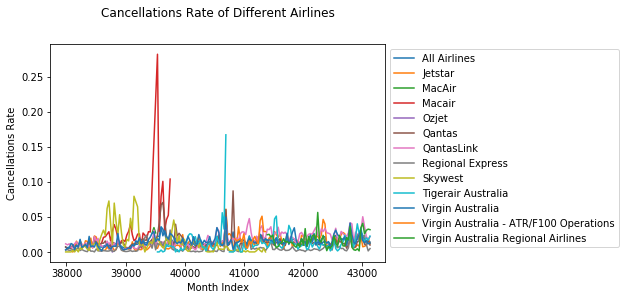

In [504]:
for airline in airlines_2['Airline'].unique():
    plt.plot(airlines_2[airlines_2['Airline']==airline]['Time'],airlines_2[airlines_2['Airline']==airline]['Cancellations'],
            label=airline)
plt.title('Cancellations Rate of Different Airlines')
plt.xlabel('Month Index')
plt.ylabel('Cancellations Rate')    

global_plot_setting()

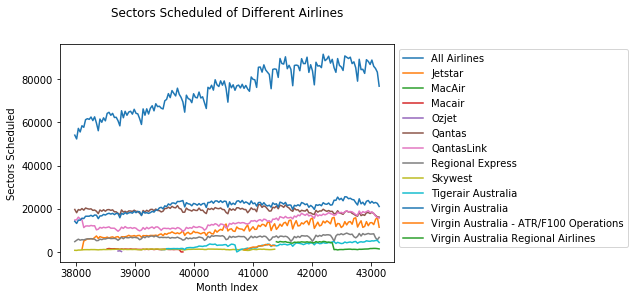

In [511]:
for airline in airlines_2['Airline'].unique():
    plt.plot(airlines_2[airlines_2['Airline']==airline]['Time'],airlines_2[airlines_2['Airline']==airline]['Sectors_Scheduled'],
            label=airline)
plt.title('Sectors Scheduled of Different Airlines')
plt.xlabel('Month Index')
plt.ylabel('Sectors Scheduled')    

global_plot_setting()

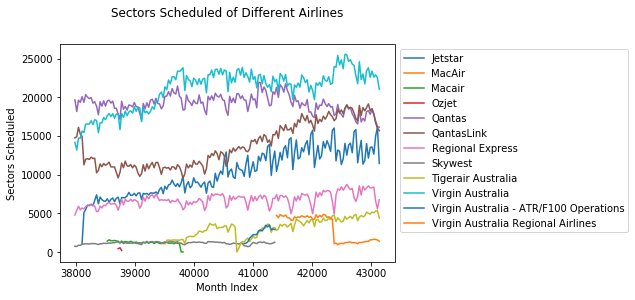

In [515]:
for airline in airlines_2['Airline'].unique()[1:]:
    plt.plot(airlines_2[airlines_2['Airline']==airline]['Time'],airlines_2[airlines_2['Airline']==airline]['Sectors_Scheduled'],
            label=airline)
plt.title('Sectors Scheduled of Different Airlines')
plt.xlabel('Month Index')
plt.ylabel('Sectors Scheduled')    

global_plot_setting()

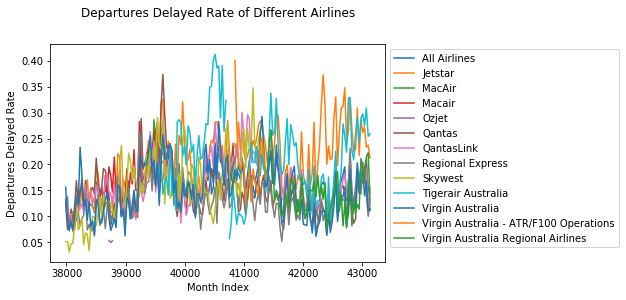

In [508]:
for airline in airlines_2['Airline'].unique():
    plt.plot(airlines_2[airlines_2['Airline']==airline]['Time'],airlines_2[airlines_2['Airline']==airline]['Departures_Delayed'],
            label=airline)
plt.title('Departures Delayed Rate of Different Airlines')
plt.xlabel('Month Index')
plt.ylabel('Departures Delayed Rate')    

global_plot_setting()

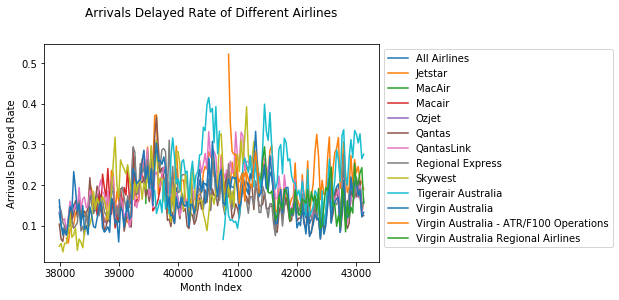

In [512]:
for airline in airlines_2['Airline'].unique():
    plt.plot(airlines_2[airlines_2['Airline']==airline]['Time'],airlines_2[airlines_2['Airline']==airline]['Arrivals_Delayed'],
            label=airline)
plt.title('Arrivals Delayed Rate of Different Airlines')
plt.xlabel('Month Index')
plt.ylabel('Arrivals Delayed Rate')    

global_plot_setting()

In [564]:
airlines_3=pd.merge(airlines_2,airlines[['Year','Month_Num','Month']],left_on='Time',right_on='Month')

In [580]:
airlines_3

,Sectors_Scheduled,Sectors_Flown,Cancellations,Departures_On_Time,Arrivals_On_Time,Departures_Delayed,Arrivals_Delayed,Time,Airline,Year,Month_Num,Month,Tmp
0,54081.0,53714,0.006786,0.870928,0.869829,0.129147,0.130245,37987,All Airlines,2004,1,37987,01/1/2004
1,54081.0,53714,0.006786,0.870928,0.869829,0.129147,0.130245,37987,All Airlines,2004,1,37987,01/1/2004
2,54081.0,53714,0.006786,0.870928,0.869829,0.129147,0.130245,37987,All Airlines,2004,1,37987,01/1/2004
3,54081.0,53714,0.006786,0.870928,0.869829,0.129147,0.130245,37987,All Airlines,2004,1,37987,01/1/2004
4,54081.0,53714,0.006786,0.870928,0.869829,0.129147,0.130245,37987,All Airlines,2004,1,37987,01/1/2004
5,54081.0,53714,0.006786,0.870928,0.869829,0.129147,0.130245,37987,All Airlines,2004,1,37987,01/1/2004
6,54081.0,53714,0.006786,0.870928,0.869829,0.129147,0.130245,37987,All Airlines,2004,1,37987,01/1/2004
7,54081.0,53714,0.006786,0.870928,0.869829,0.129147,0.130245,37987,All Airlines,2004,1,37987,01/1/2004
8,54081.0,53714,0.006786,0.870928,0.869829,0.129147,0.130245,37987,All Airlines,2004,1,37987,01/1/2004
9,54081.0,53714,0.006786,0.870928,0.869829,0.129147,0.130245,37987,All Airlines,2004,1,37987,01/1/2004


In [579]:
airlines_3['Tmp']=tmp

In [ ]:
motion_table['Date'] = motion_table.Date.apply(lambda x: datetime.datetime.strftime(x, '%d/%m/%y'))

In [577]:
tmp=[]
for i in range(len(airlines_3['Time'])):
    tmp+=[ '01/'+ str(airlines_3['Month_Num'][i])+'/'+str(airlines_3['Year'][i])]
tmp

['01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1/2004',
 '01/1

In [500]:
mChart = MotionChart(df = airlines_2, key='Time', x='Departures_On_Time', y='Arrivals_On_Time', xscale='linear', yscale='linear',
                     size='Sectors_Flown', color='Airline', category='Airline')
mChart.to_notebook()

In [501]:
mChart = MotionChart(df = airlines_2, key='Time', x='Departures_Delayed', y='Arrivals_Delayed', xscale='linear', yscale='linear',
                     size='Sectors_Flown', color='Airline', category='Airline')
mChart.to_notebook()

In [502]:
mChart = MotionChart(df = airlines_2, key='Time', x='Departures_On_Time', y='Cancellations', xscale='linear', yscale='linear',
                     size='Sectors_Flown', color='Airline', category='Airline')
mChart.to_notebook()